In [2]:
%matplotlib notebook

import sys, os, glob, imp, fnmatch, re
from copy import deepcopy

import matplotlib.pyplot as plt

import numpy as np
import scipy

from collections import OrderedDict

from ipywidgets import *
from IPython.display import display, Image

from lmfit import Model, Parameters
from lmfit.models import LinearModel, GaussianModel, PseudoVoigtModel

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pyFAI
from pyFAI.multi_geometry import MultiGeometry
from silx.io.specfile import SpecFile

from joblib import Parallel, delayed
import multiprocessing as mp

sys.path.append('C:\\Users\\Public\\repos\\xdart')
from xdart.utils import get_motor_val
from xdart.utils import get_from_pdi, query_yes_no, read_image_file, smooth_img, get_fit, fit_images_2D
from xdart.pySSRL_bServer.bServer_funcs import specCommand, wait_until_SPECfinished, get_console_output

import time
from pathlib import Path

In [6]:
specCommand("print PD_SAVEPATH ' ' DATAFILE  ' ' SCAN_N", print_console=False)

Executed 



In [7]:
out = get_console_output(idx=1)[0]
out

'~/data/Feb2020/images/ test 2'

In [5]:
pd_savepath, filename, scan_n = out.split(' ')

In [15]:
specCommand(f'pd savepath {pd_savepath}; newfile_f("{filename}", {scan_n})')#, print_console=False)

Executed 



In [13]:
specCommand('p "saved settings restored"')

Executed 



In [6]:
path = 'P:\\bl2-1\\Feb2020'

scan4 = 'Scan4_Integrate_1D_Live.xye'
scan5 = 'Scan4_Integrate_1D_batch.xye'

int_1d_scan4_live = np.loadtxt(os.path.join(path, scan4))
int_1d_scan5_live = np.loadtxt(os.path.join(path, scan5))

<IPython.core.display.Javascript object>


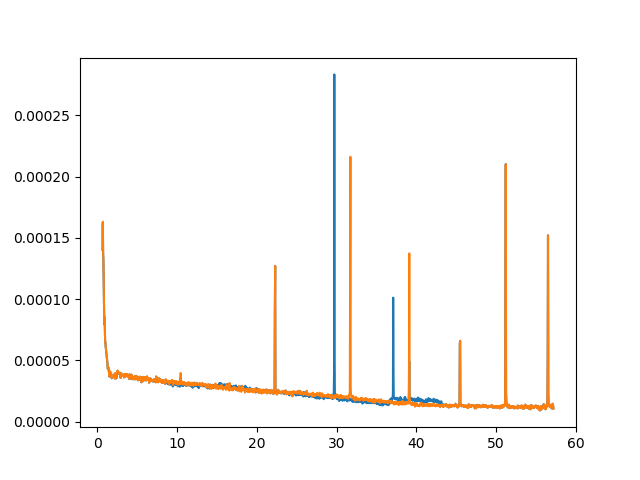

In [7]:
plt.figure()

x1, y1 = int_1d_scan4_live[:,0], int_1d_scan4_live[:,1]
x2, y2 = int_1d_scan5_live[:,0], int_1d_scan5_live[:,1]

plt.plot(x1, y1)
plt.plot(x2, y2)

In [8]:
from xdart.pySSRL_bServer.watcher import Watcher

In [14]:
watcher = Watcher()

#watcher.watchPaths = ['Z:\\', 'P:\\bl2-1\\Feb2020\\images']
watcher.watchPaths = ['P:\\bl2-1\\Feb2020\\images']
watcher.filetypes = ['pdi']
watcher.verbose = True

In [15]:
watcher.run()

pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0000.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0001.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0002.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0003.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0004.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0005.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0006.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0007.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0008.raw.pdi']
pdi - Added: ['P:\\bl2-1\\Feb2020\\images\\b_stone_LaB6_capillary_beamstop_2_scan7_0009.raw.pdi']
pdi - Added: ['P:\\b

KeyboardInterrupt: 

In [6]:
os.scandir('Z:\\')

In [7]:
os.scandir?

In [37]:
files = [f.stat().st_atime for f in os.scandir('Z:\\')]

<IPython.core.display.Javascript object>


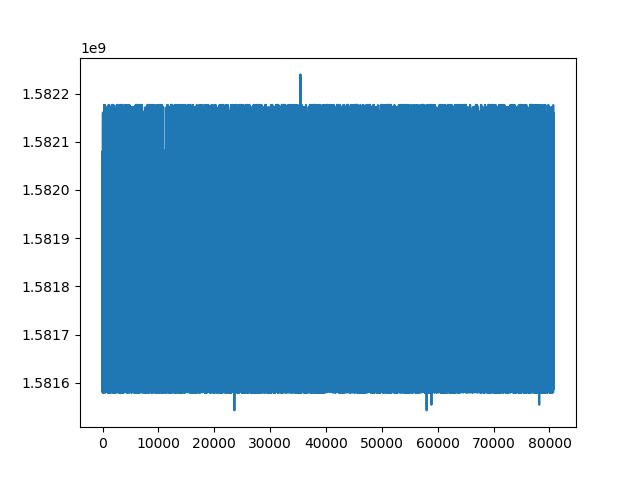

In [39]:
plt.figure()
plt.plot(files)

In [23]:
f = files[0]

In [30]:
fstat

os.stat_result(st_mode=33206, st_ino=0, st_dev=0, st_nlink=0, st_uid=0, st_gid=0, st_size=379860, st_atime=1581865940, st_mtime=1581865938, st_ctime=1581865938)

In [34]:
fstat = f.stat()
fstat.st_atime

1581865940.7327726

In [11]:
files = os.listdir('Z:\\')

In [15]:
import glob
files = glob.glob('Z:\\*.raw')

In [35]:
os.walk?

In [20]:
import pathlib

path = pathlib.Path('Z:\\')
files = [f for f in path.glob('*.raw')]


In [42]:
os.path.dirname('Z:\\abc.png')

'Z:\\'